# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Set a csv file path
whale_navs_csv = Path('./Resources/whale_navs.csv')

# Read into a pandas dataframe
whale_navs_df = pd.read_csv(whale_navs_csv, 
                            index_col='date',
                            infer_datetime_format=True,
                            parse_dates=True
)


# Review the first 5 rows of the DataFrame
whale_navs_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns = whale_navs_df.pct_change().dropna()

daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Return Performance Overlay'}, xlabel='date'>

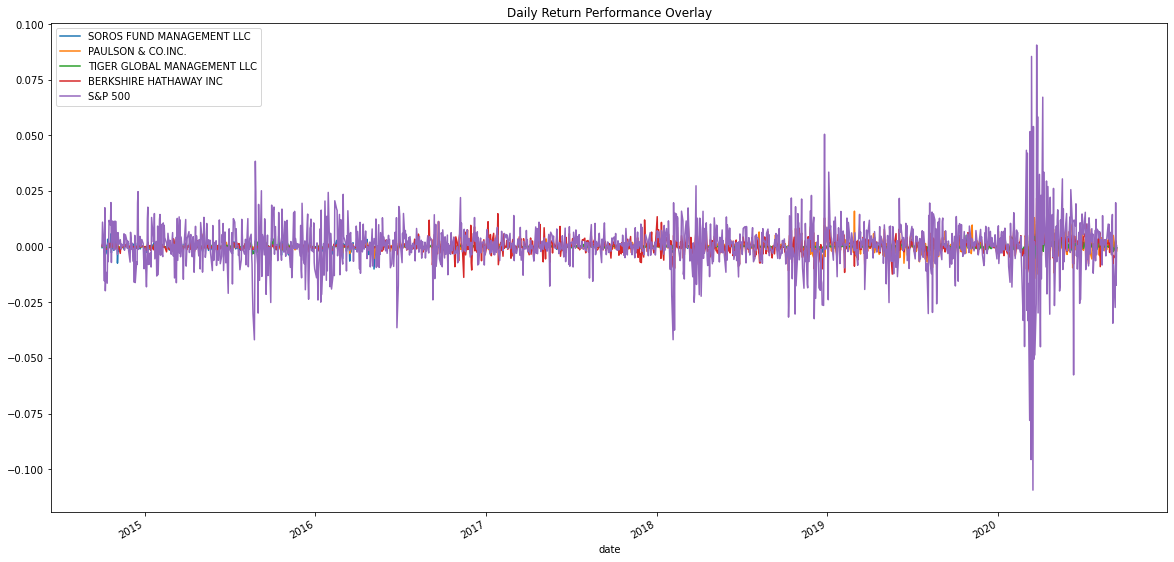

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(figsize=(20,10), title='Daily Return Performance Overlay')


<AxesSubplot:title={'center':'Soros Fund Management LLC Returns'}, xlabel='date'>

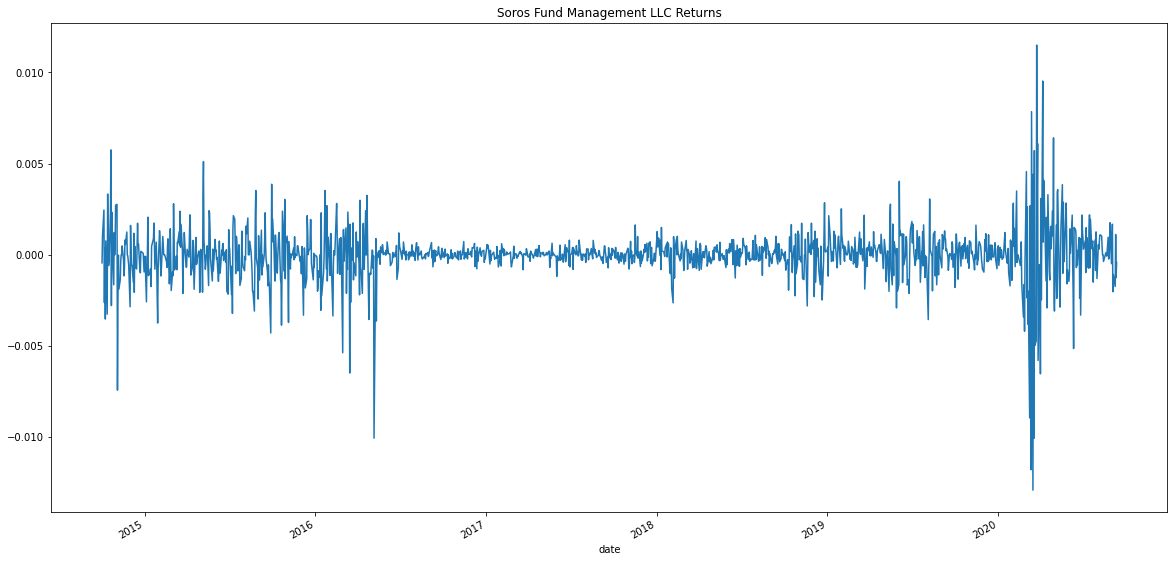

In [5]:
# Plot individual funds for easier visualization of individual behavior
# Soros Fund Management LLC
daily_returns['SOROS FUND MANAGEMENT LLC'].plot(figsize=(20,10), title='Soros Fund Management LLC Returns')

<AxesSubplot:title={'center':'Tiger Global Management LLC Returns'}, xlabel='date'>

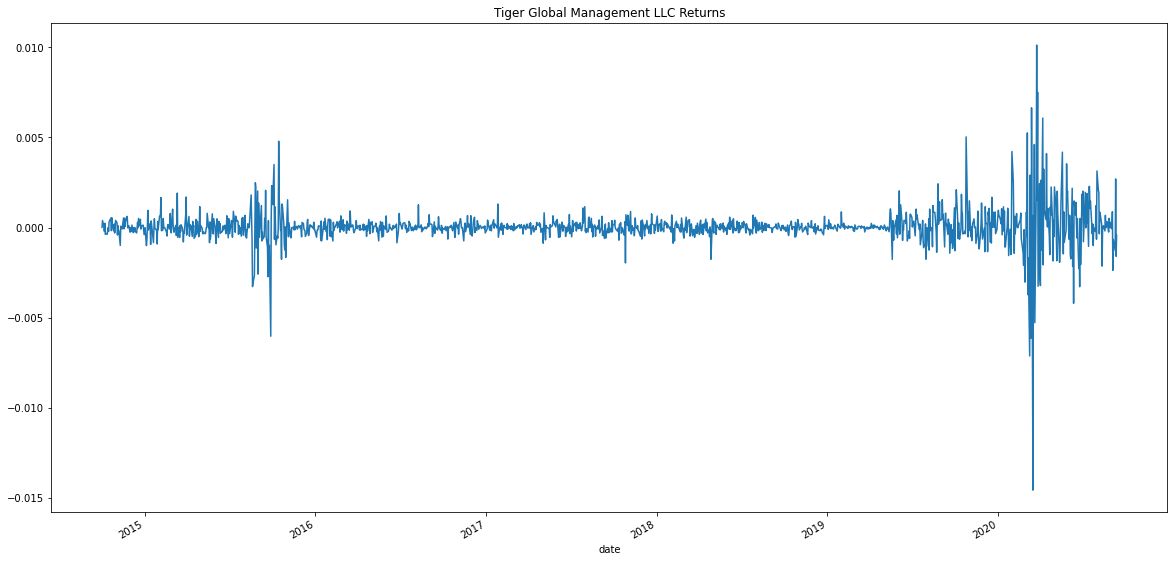

In [6]:
# Tiger Global Managmenet LLC
daily_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(figsize=(20,10), title='Tiger Global Management LLC Returns')

<AxesSubplot:title={'center':'Paulson & Co. Inc. Returns'}, xlabel='date'>

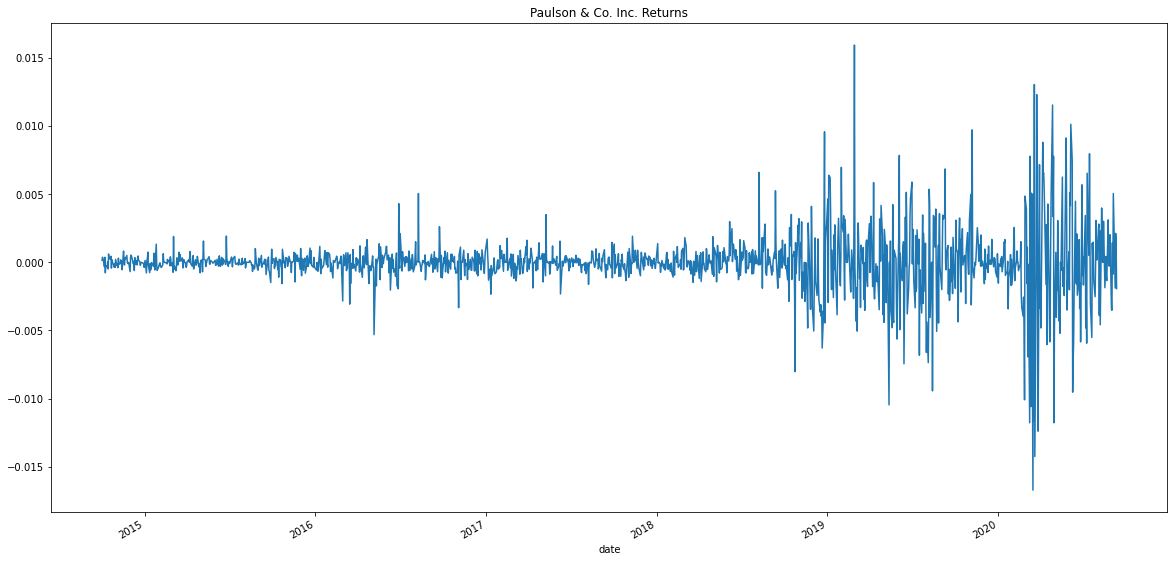

In [7]:
# Paulson & Co Inc 
daily_returns['PAULSON & CO.INC.'].plot(figsize=(20,10), title='Paulson & Co. Inc. Returns')

<AxesSubplot:title={'center':'Berkshire Hathaway Inc Returns'}, xlabel='date'>

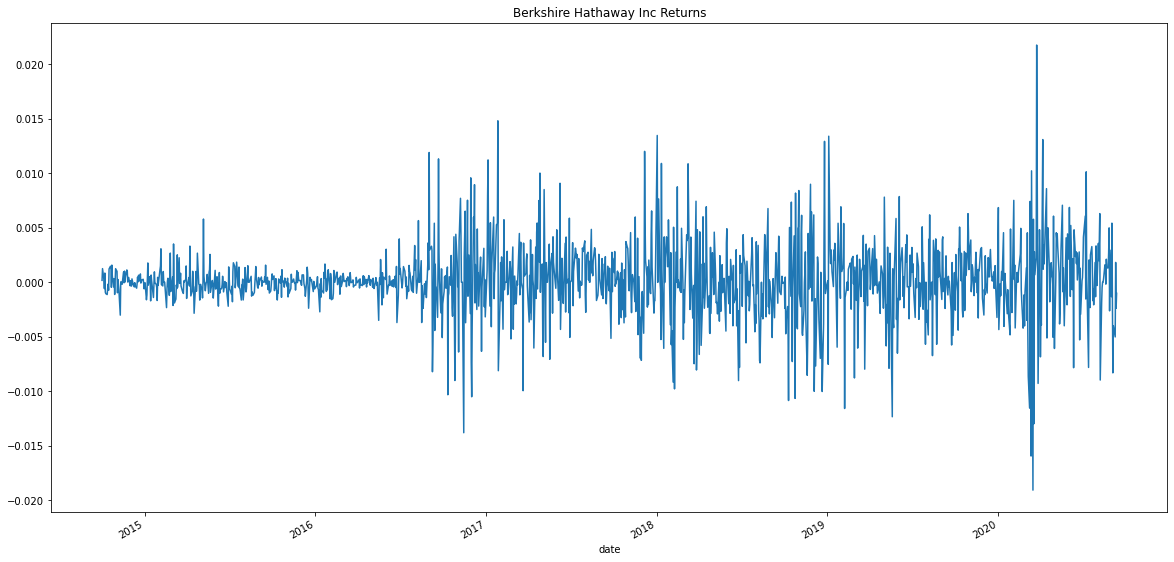

In [8]:
# Berkshire Hathaway Inc
daily_returns['BERKSHIRE HATHAWAY INC'].plot(figsize=(20,10), title='Berkshire Hathaway Inc Returns')

<AxesSubplot:title={'center':'Overall Market Returns'}, xlabel='date'>

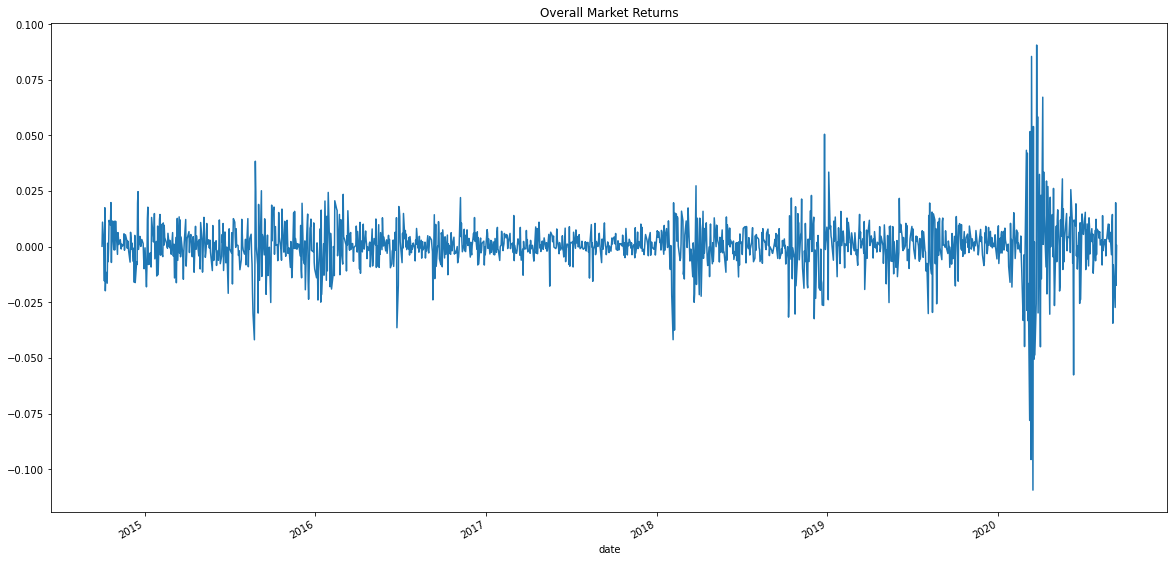

In [9]:
# Market S&P 500 Returns
daily_returns['S&P 500'].plot(figsize=(20,10), title='Overall Market Returns')

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [10]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Adding the -1 to normalize values back to percentages
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + daily_returns).cumprod() - 1

cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341
2020-09-10,-0.014502,-0.040260,0.055539,0.237883,0.717983
2020-09-11,-0.014914,-0.042113,0.055081,0.236625,0.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'4 Whale Overlayd and overall market of Cumulative Returns'}, xlabel='date'>

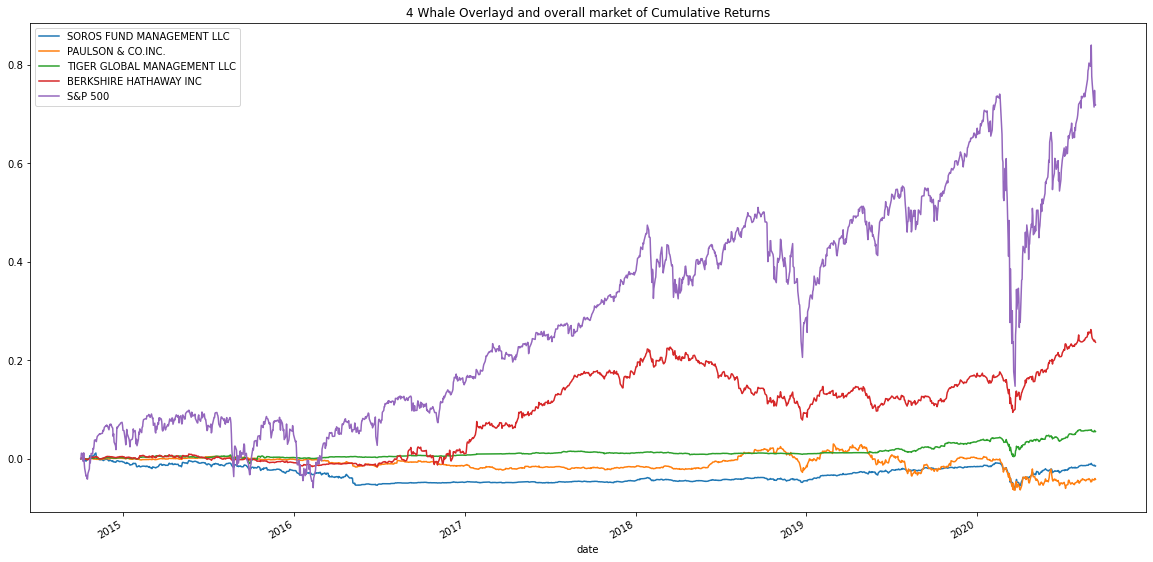

In [11]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
# General Overlay of all 4 funds and the S&P 500
cumulative_returns.plot(figsize=(20,10), title='4 Whale Overlay and overall market of Cumulative Returns')

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** It does not appear that any of the 4 funds outperform the overall market in terms of cumulative returns in the long run. While the S&P 500 appears to be more volatile at times it quickly recovers and stays above the other fund in terms of cumilative returns. By the end of this time period the S&P has cumulative returns of 1.72 compared to the next highest which is Berkshire Hathaway at 1.23. Berkshire Hathaway looks like it follows the overall market with respect to cumulative returns while the other funds appear to flatline and even dip towards the end of 2020. 

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Volatility Between 4 Whale Funds and the Overall Market'}>

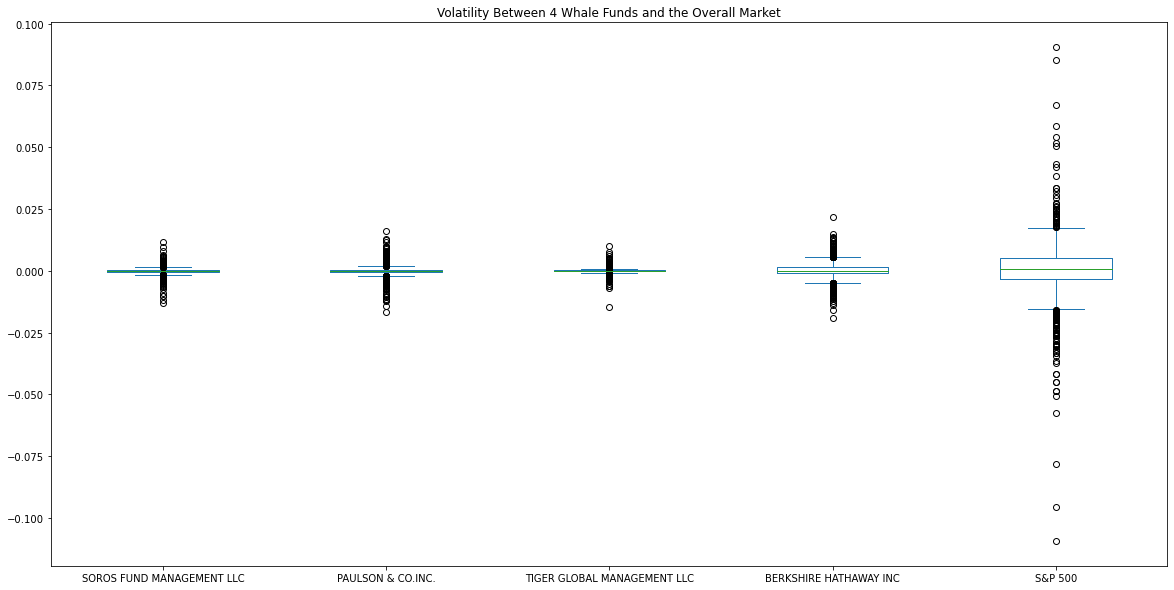

In [12]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot.box(figsize=(20,10), title='Volatility Between 4 Whale Funds and the Overall Market')


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':"4 Whale Fund's Daily Returns"}>

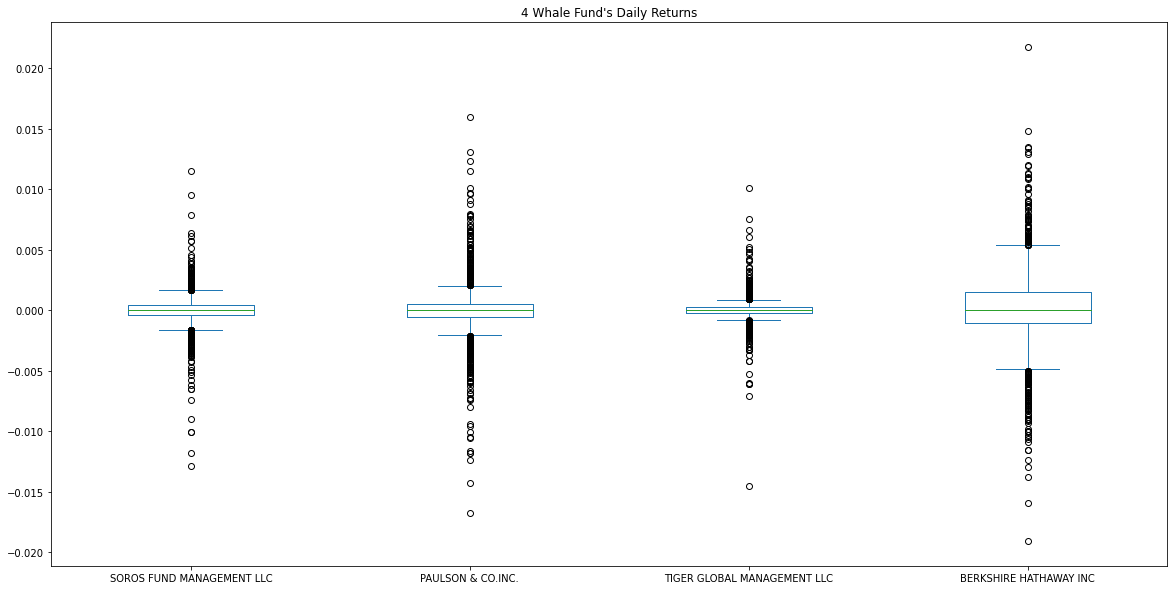

In [13]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size

# Drop the S&P 500 column
whales_returns = daily_returns.drop(columns='S&P 500')
# Review first five rows to ensure S&P 500 was dropped
whales_returns.head()
# Plot the boxes
whales_returns.plot.box(figsize=(20,10), title="4 Whale Fund's Daily Returns")


#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Berkshire Hathaway has the greatest spread of its interquartile range and outliers indicating it is the most volatile of the 4 whale funds. The fund with the smallest spread looks to be Tiger Global Management LLC.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [14]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviation = daily_returns.std()

standard_deviation_sorted = standard_deviation.sort_values()

standard_deviation_sorted.head()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [15]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
year_trading_days = 252

annualized_standard_deviation = standard_deviation  * np.sqrt(year_trading_days)

annualized_standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation of Returns Compared to Overall Market'}, xlabel='date'>

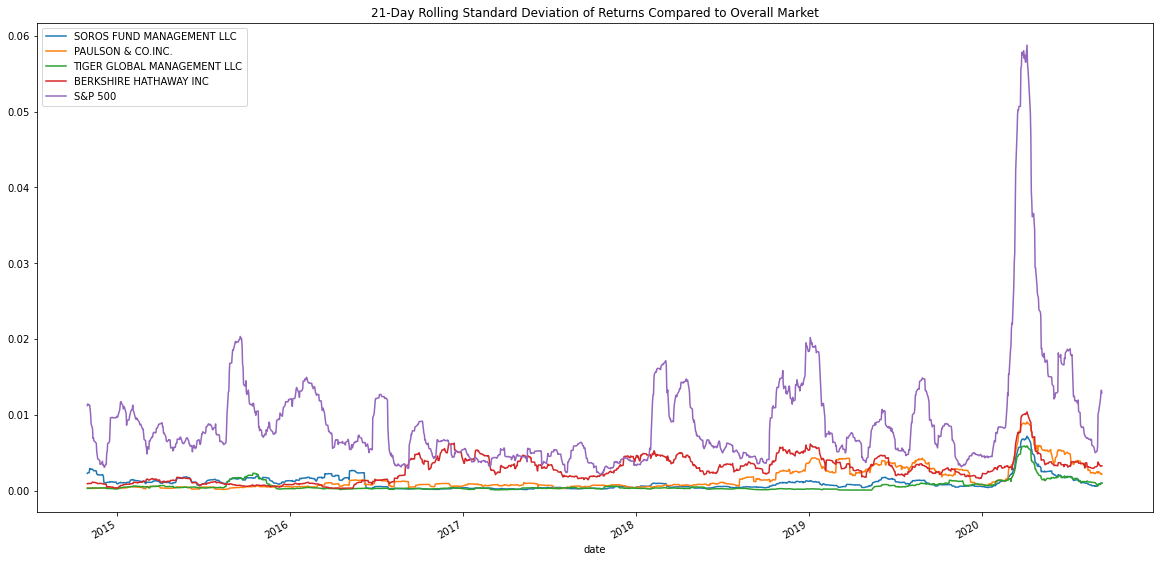

In [16]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
standard_deviation_21_rolling = daily_returns.rolling(window=21).std()

standard_deviation_21_rolling.plot(figsize=(20,10), title='21-Day Rolling Standard Deviation of Returns Compared to Overall Market')

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'4 Whales 21-Day Rolling Standard Deviation of Returns'}, xlabel='date'>

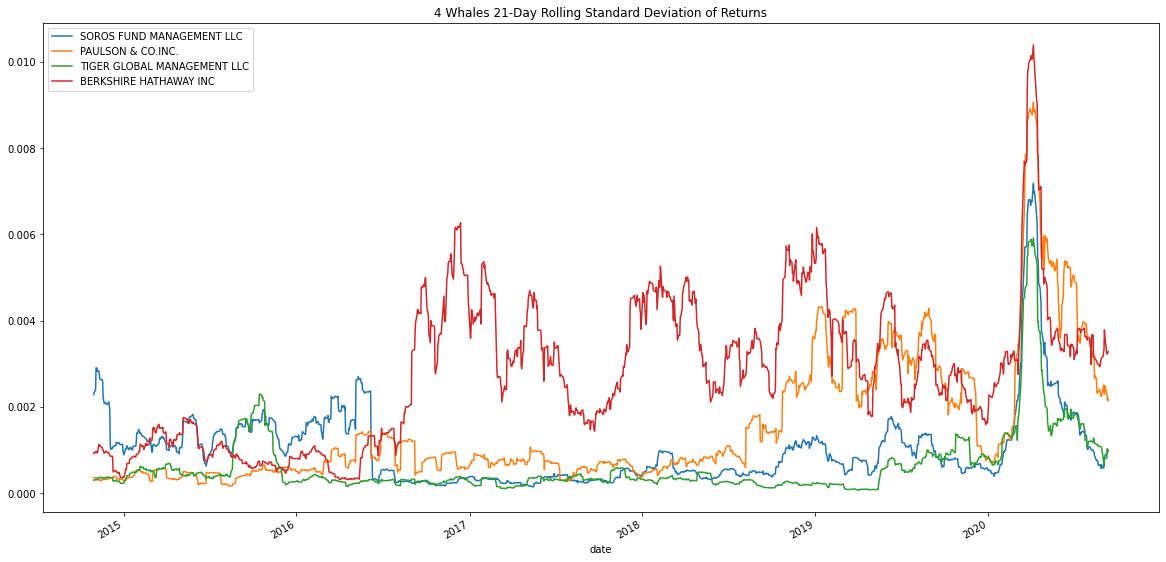

In [17]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
whales_std_21_rolling = whales_returns.rolling(window=21).std()

whales_std_21_rolling.plot(figsize=(20,10), title='4 Whales 21-Day Rolling Standard Deviation of Returns')

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** It seems like the S&P 500 poses the highest risk as the annualized standard deviation for this time period is at 0.18 and the next highest is Berkshire Hathaway at 0.05. The other portfolios have a lower risk than the S&P 500 based on their annualized standard deviation and if one is risk averse investing in any of the 4 portfolios in this analysis will offer a significant risk reduction compared to investing in the overall market.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Yes and no. Between years 2015-2016 the market has a highly fluctuating rolling 21-day standard deviation while the 4 hedge funds remain at consistently low standard deviations or low risk. As time progresses we can see that between 2017-2018 Berkshire Hathaway's 21-day rolling standard deviation starts to follow the market's movements mimicking its risk profile, but never being as variant or as high. The other funds during this time have a very low and unwavering standard deviation. It isn't until the years 2019 and especially in 2020 we can see a noticeable similarity in risk movement of all 4 hedge funds compared to the overall market. In 2019 we can see Paulson & Co begin to have risk variability imitating the S&P 500 and Berkshire Hathaway. And in 2020, when we can assume the pandemic took the economy by full force we can see a huge spike in risk for all of the funds including the overall market.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Berkshire Hathaway has a consistently high level of risk compared to the other funds in this analysis. The rolling 21-Day standard deviation for Berkshire Hathaway increases first and remains higher than the others throughout this analyzed time period. It also spikes the highest in 2020.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [18]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year, recall earlier variable for this number as it is defined above
# Review the annual average returns sorted from lowest to highest
average_annual_returns = daily_returns.mean() * year_trading_days

average_annual_returns.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [19]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# Sharpe Ratios = average annualized return - riskfree rate (assumed 0) / annualized standard deviation
annualized_sharpe_ratios = average_annual_returns / annualized_standard_deviation
annualized_sharpe_ratios.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

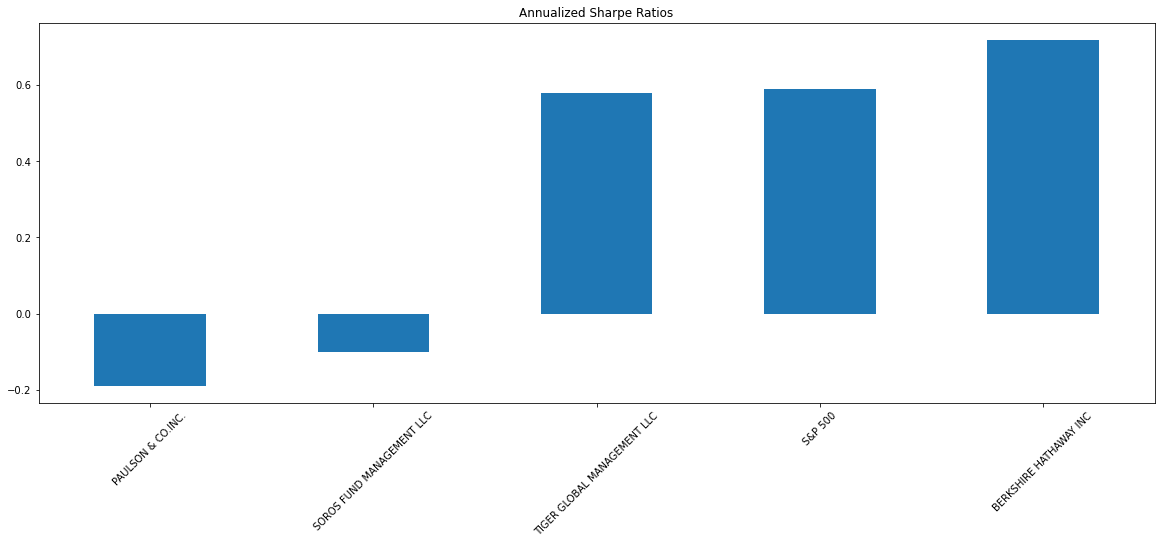

In [20]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
annualized_sharpe_ratios.sort_values().plot.bar(figsize=(20,7), title='Annualized Sharpe Ratios', rot=45)

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** Berkshaire Hathaway has the highest risk return rate at 0.72 compared to even the overall market which has a risk return rate of 0.5. The other funds pale in comparison and the worst is Paulson & Co with a Sharpe Ratio of -0.19. If you are interested in investing in something that follows the market, but is much less risky Tiger Global seems to have a Sharpe Ratio similar to that of the market and from earlier analysis is one of the least risky investments. 

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

Two Portfolios of interest based on similar sharpe ratio values:

Portfolio 1 - Berkshire Hathaway

Portfolio 2 - Tiger Global

In [21]:
# Create Variables for Portfolio 1 and Portfolio 2 for potential usage later
port_1 = 'BERKSHIRE HATHAWAY INC'
port_2 = 'TIGER GLOBAL MANAGEMENT LLC'

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [22]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
# visualize last 5 rows of dataframe
sp500_var_60_rolling = daily_returns['S&P 500'].rolling(window=60).var()
sp500_var_60_rolling.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [23]:
# Calculate the covariance using a 60-day rolling window for Berkshire Hathaway
# Review the last five rows of the covariance data
berkshire_rolling_60_covariance = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P 500'])
berkshire_rolling_60_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [24]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE
berkshire_rolling_60_beta = berkshire_rolling_60_covariance / sp500_var_60_rolling

berkshire_rolling_60_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [25]:
# Calculate the average of the 60-day rolling beta
berkshire_rolling_60_beta.mean()

0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Berkshire Hathaway 60-Day Rolling Beta'}, xlabel='date'>

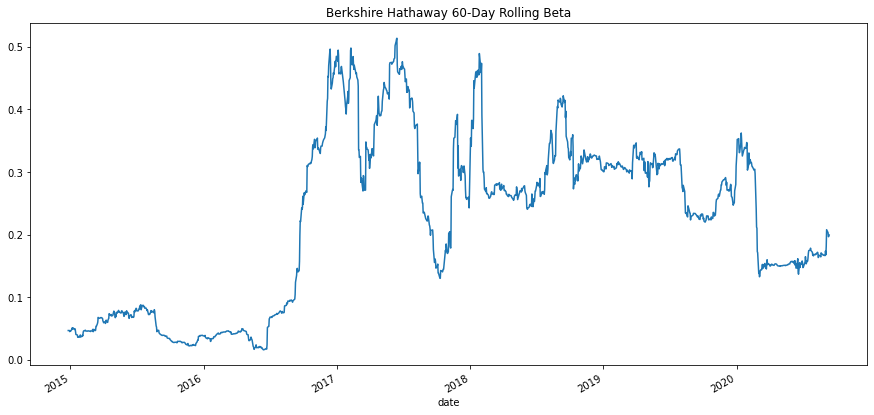

In [26]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
berkshire_rolling_60_beta.plot(figsize=(15, 7), title='Berkshire Hathaway 60-Day Rolling Beta')


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [27]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE
tiger_global_rolling_60_covariance = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
tiger_global_rolling_60_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [28]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE
tiger_global_rolling_60_beta = tiger_global_rolling_60_covariance / sp500_var_60_rolling

tiger_global_rolling_60_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [29]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE
tiger_global_rolling_60_beta.mean()

0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Tiger Global Management LLC 60-Day Rolling Beta'}, xlabel='date'>

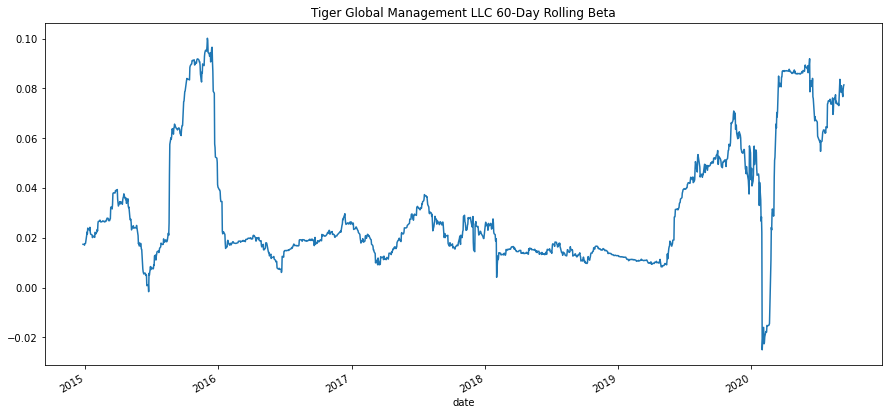

In [30]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
tiger_global_rolling_60_beta.plot(figsize=(15, 7), title='Tiger Global Management LLC 60-Day Rolling Beta')

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Berkshire Hathaway (BH) had a higher average beta value at 0.2 compared to Tiger Global Management LLC (TG) at .03 indicating it is more sensitive to market fluctuations. 


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** Based on the rolling beta it would seem the less risky investment choice would be TG seeing as it is almost unaffected by market fluctations. If the market changes TG virtually has no change in value. Throughout the time frame 2015-2020 TG fluctuates between a beta of 0.1 and -0.02. A beta > 1 would mean the firms value would fluctuate greater than the market, but here the beta is essentially 0. BH has a B fluctuating between 0 and 0.5. Definitely higher than TG, but still compared to the overall market it is relatively stable.   

However, both firms have a similar sharpe ratio at ~ +0.6 indicating a fairly decent risk/return profile. Berkshire Hathaway has an overall higher cumulative return value of about 24% compared to TG which is just at 5%. So, if you are looking for greater profits it seems like BH is the wiser choice even though you incur a bit more risk. 

---